In [2]:
pip install scipy #datos estadisticos

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#datos': Expected package name at the start of dependency specifier
    #datos
    ^


In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular ciertos estadísticos
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Para crear combinaciones de columnas
# ------------------------------------------------------------------------------
from itertools import combinations

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 6\\datos\\CardioGoodFitness.csv')


In [4]:
df.head() # education es categorica, aunque este numerica por lo que calcular una media no tiene sentido pero la moda sí

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df['Education'] = df['Education'].astype('O')
df.dtypes

Product          object
Age               int64
Gender           object
Education        object
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df['Income'].describe().reset_index().round(2) #media mayor que la mediana
#media, cuantos tendriamos todos si tenemos lo mismo

,index,Income
0,count,180.00
1,mean,53719.58
2,std,16506.68
3,min,29562.00
4,25%,44058.75
5,50%,50596.50
6,75%,58668.00
7,max,104581.00


In [7]:
df.describe() #num

,Age,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.084797,0.958869,16506.684226,51.863605
min,18.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df.select_dtypes('O').describe() #categoricas

,Product,Gender,Education,MaritalStatus
count,180,180,180,180
unique,3,2,8,2
top,TM195,Male,16,Partnered
freq,80,104,85,107


In [9]:
df['Gender'].mode() # me devuelve una serie, si hago values me devuelve un array

0    Male
Name: Gender, dtype: object

In [10]:
df['Gender'].mode()[0] # me devuelve solo el valor

'Male'

In [11]:
df['Income'].std()

16506.68422623862

Lo anterior nos dice que hay datos atípicos

In [12]:
df['Income'].mean()

53719.57777777778

In [13]:
df['Income'].median()

50596.5

<Axes: xlabel='Income'>

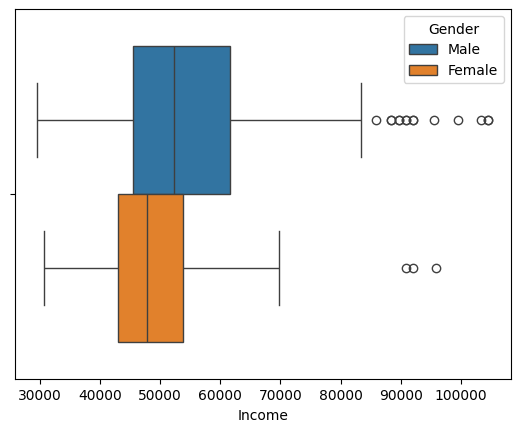

In [14]:
sns.boxplot(x= 'Income', hue = 'Gender', data=df)

Con la tabla, podemos ver los datos atípicos de cada género

<Axes: xlabel='Income'>

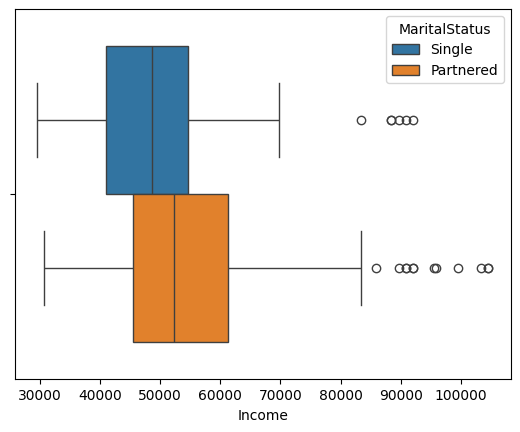

In [15]:
sns.boxplot(x= 'Income', hue = 'MaritalStatus', data=df)

<Axes: xlabel='Income'>

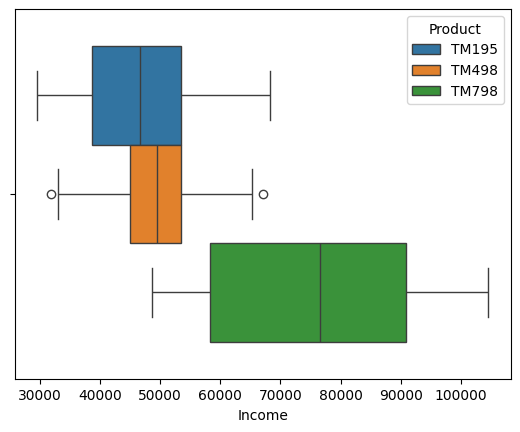

In [16]:
sns.boxplot(x= 'Income', hue = 'Product', data=df)

<Axes: xlabel='Income'>

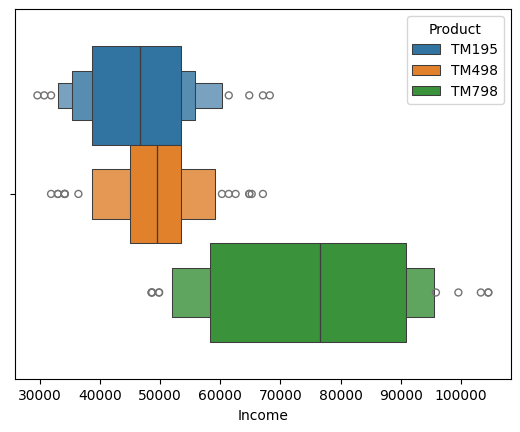

In [17]:
sns.boxenplot(x= 'Income', hue = 'Product', data=df) # es como el violin, pero no me distingue kis bigotes. mejor usar boxplot

<Axes: xlabel='Income', ylabel='Count'>

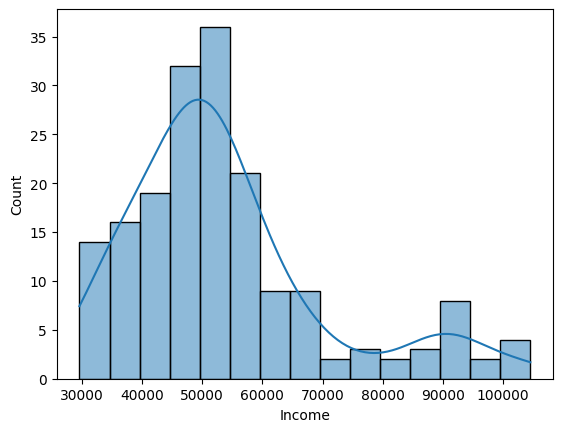

In [18]:
sns.histplot(x = 'Income', data=df, kde=True) #kde nos pone la línea

In [19]:
stats.skew(df['Income'])
# si es cercano a 0, la dist es simétrica
# si es mayor a 0, la cola se mueve a la derecha y sus valores atipicos estan a la derecha
# si es menor a 0, la cola se mueve a la izquierda y sus valors atipicos estan a la izquierda

1.2809946733261928

In [20]:
normal = np.random.normal(loc=0, scale= 0.1, size= 1000) #media, desv, size

<Axes: ylabel='Count'>

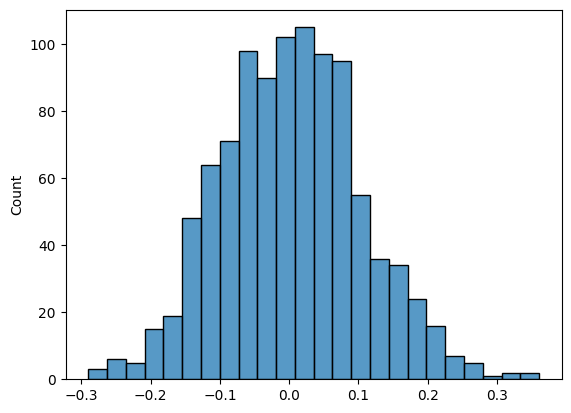

In [21]:
sns.histplot(x=normal)


In [22]:
stats.skew(normal)

0.16676264192269258

In [23]:
pd.DataFrame(normal).kurt()

0    0.090082
dtype: float64

In [24]:
pd.DataFrame(normal).std() # poca dispersion

0    0.101838
dtype: float64

Cambio

In [25]:
uniforme = np.random.uniform(low=-5, high=5, size= 5000) #media, desv, size
uniforme

array([-1.90342186, -0.11155336, -1.44055577, ...,  4.66260742,
       -4.14871965, -1.65038993])

<Axes: ylabel='Count'>

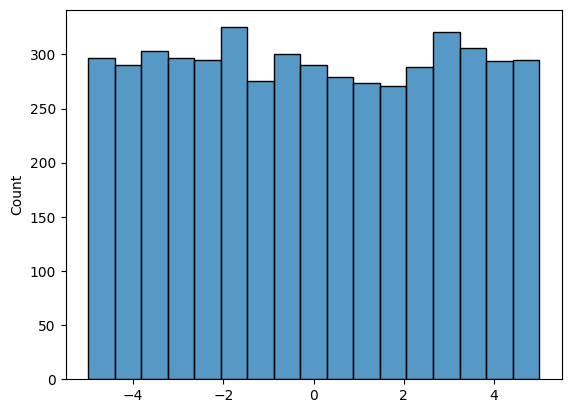

In [26]:
sns.histplot(x=uniforme)

In [27]:
stats.skew(uniforme)

0.01319686945744802

In [28]:
pd.DataFrame(uniforme).kurt()

0   -1.220022
dtype: float64

In [29]:
pd.DataFrame(uniforme).std() # gran dispersion

0    2.904685
dtype: float64

In [30]:
df.corr(numeric_only=True) # las de 1 son con ellas mismas
# 1-0.7 es una relacion directamente proporcional fuerte
# 0.6-0.4 es moderada
# 0.4-0.3 debil

,Age,Usage,Fitness,Income,Miles
Age,1.000000,0.015064,0.061105,0.513414,0.036618
Usage,0.015064,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.759130,0.785702,0.543473,1.000000


<Axes: >

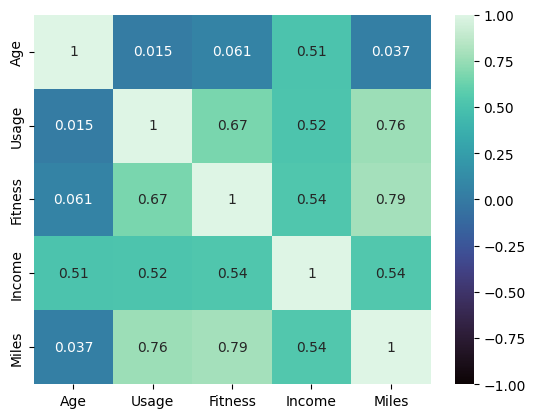

In [31]:
sns.heatmap(df.corr(numeric_only=True), #info duplicada
            annot=True, 
            vmax= 1, 
            vmin=-1,
            cmap='mako')

In [32]:
df_corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool)) #triu toma todos los de la diagonal
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

<Axes: >

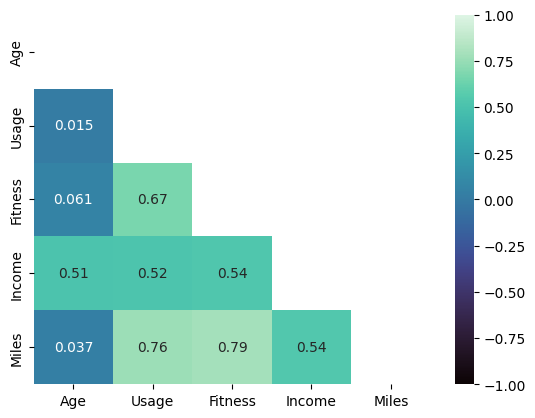

In [33]:
sns.heatmap(df.corr(numeric_only=True), # si quiero cambiar, le pongo method = y elijo cual de las tres
            annot=True, 
            vmax= 1, 
            vmin=-1,
            cmap='mako',
            mask=mask) #con la mascara me quito los duplicados

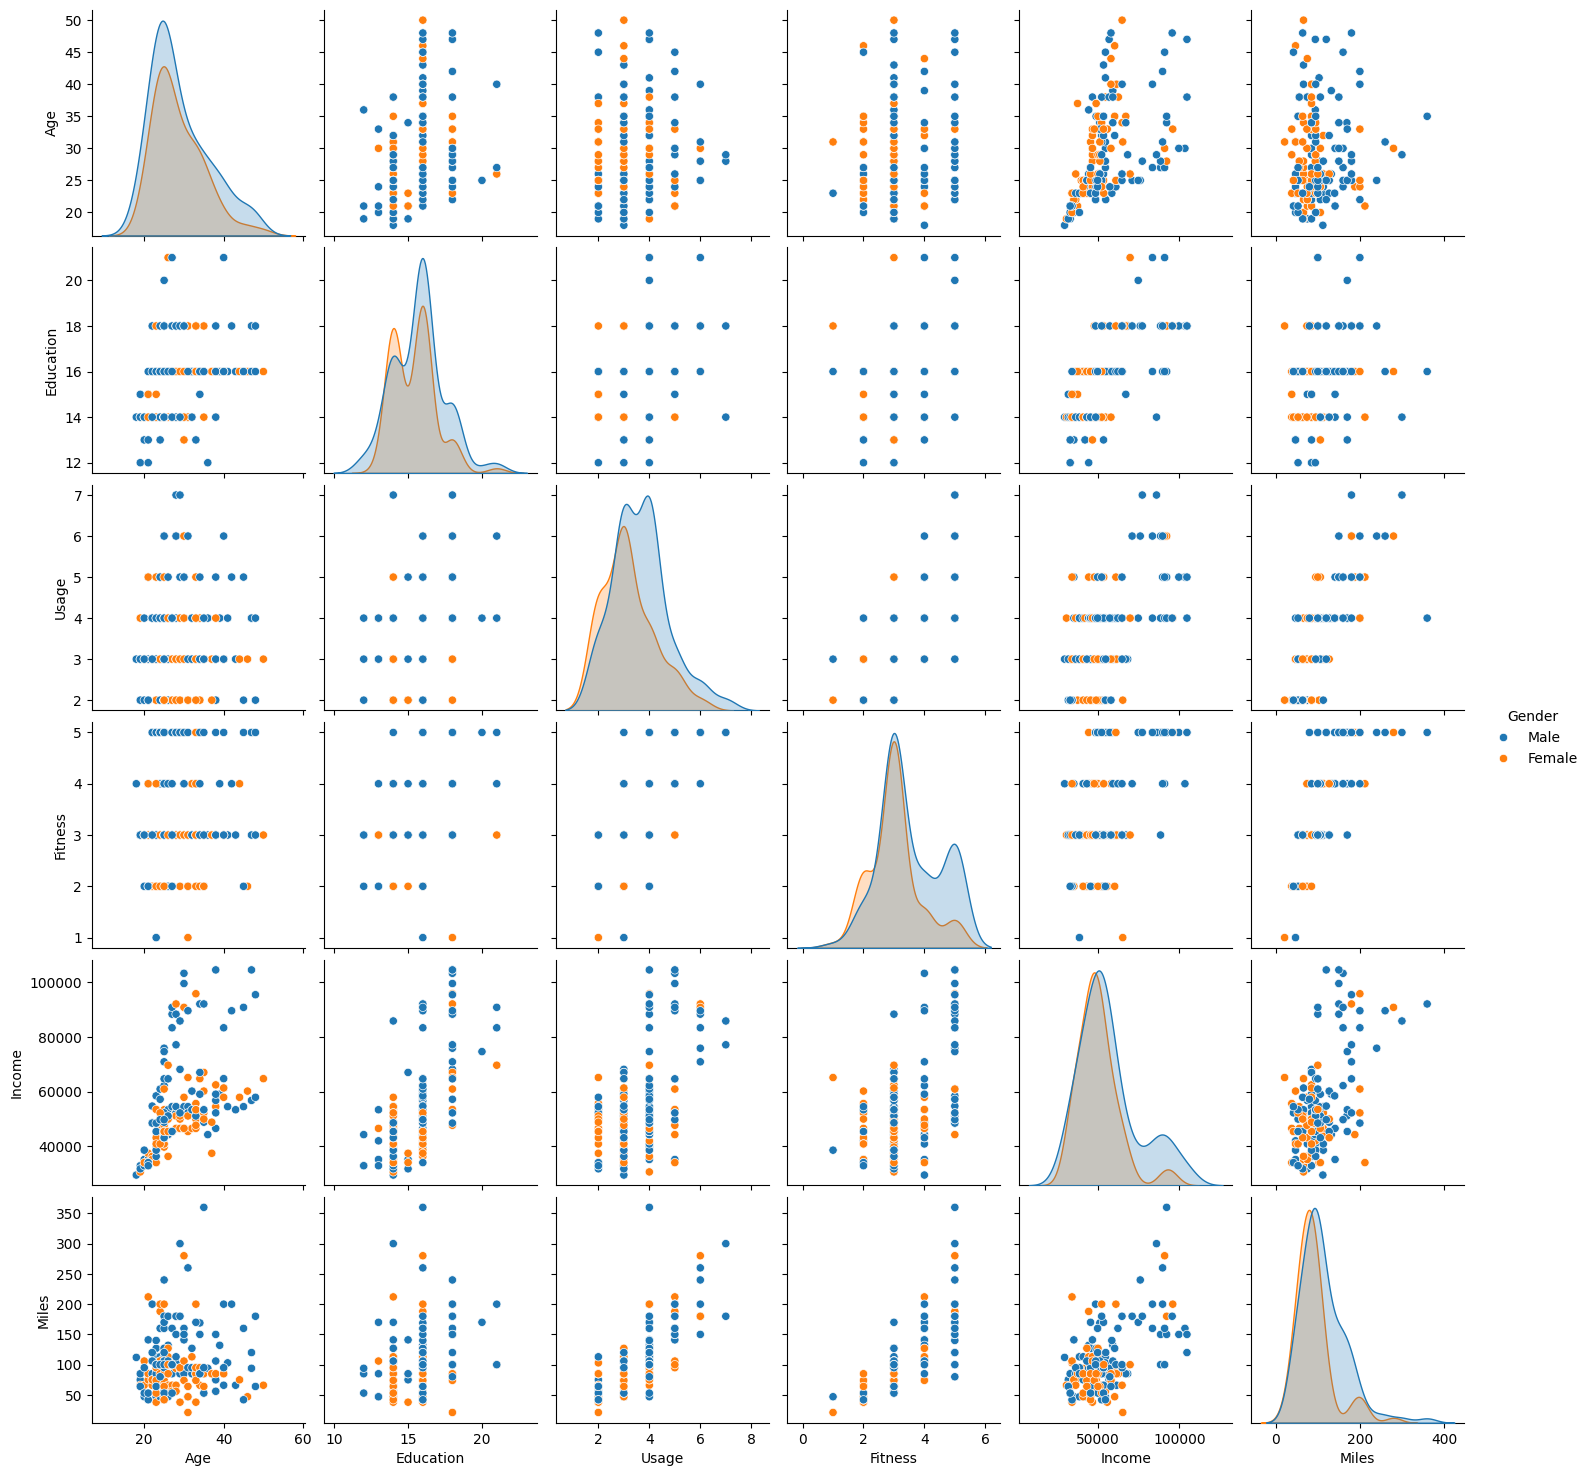

In [34]:
sns.pairplot(df, hue='Gender')

Tablas de frecuencia y contingencias

In [35]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [38]:
df_cat = df.select_dtypes('O').head()

*Tablas de frecuencia

<Axes: xlabel='Gender', ylabel='count'>

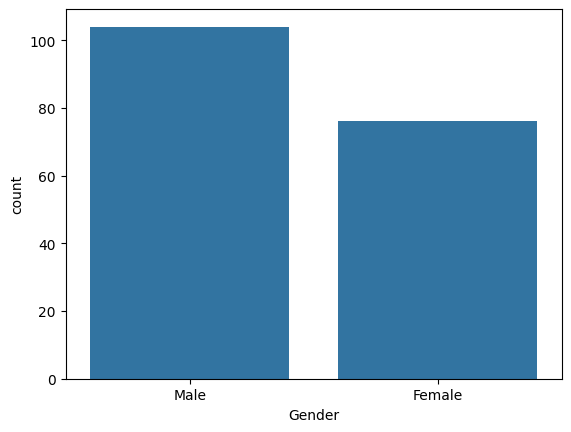

In [37]:
sns.countplot(x= 'Gender', data=df)

0 ..... Product
1 ..... Gender
2 ..... Education
3 ..... MaritalStatus


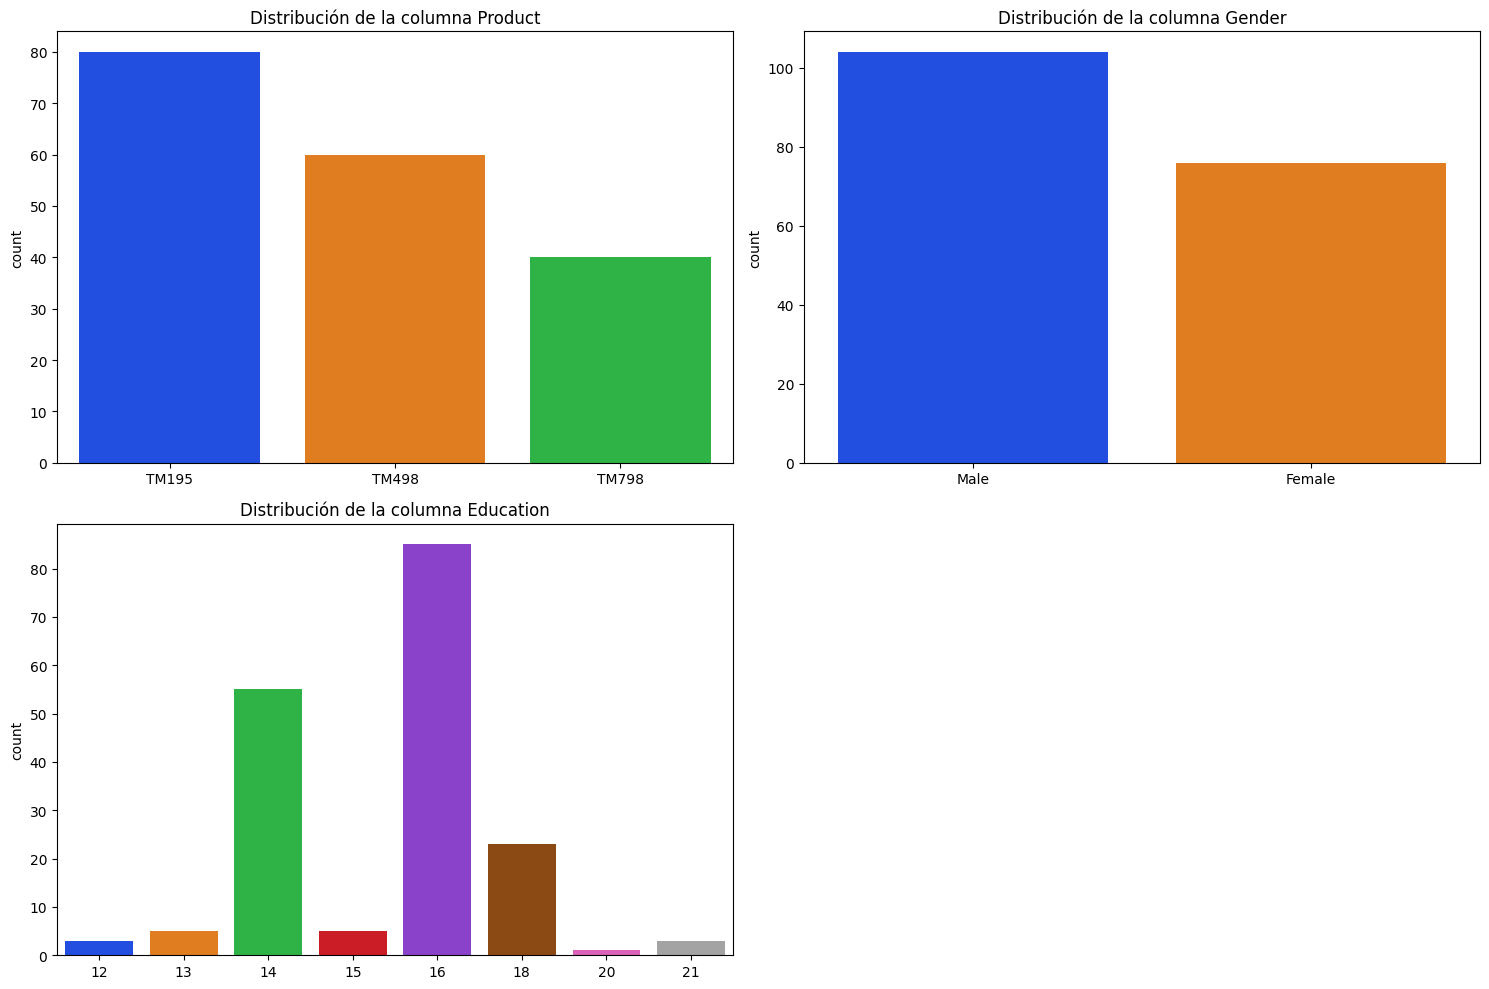

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))

axes = axes.flat # pasamos el 2x2 a una dimension
for indice,col in enumerate(df_cat.columns): #enumerate para tomar los indices y las columnas del data frame de las categoricas
    print(indice,'.....',col) #mostramos ambos para comprobar
    sns.countplot(x=col, data=df, ax=axes[indice], palette='bright')
    axes[indice].set_title(f'Distribución de la columna {col}') #ponemos titulos
    axes[indice].set_xlabel('')

fig.delaxes(axes[-1]) # para eliminar la ultima visualizacion
plt.tight_layout()

*Tablas de contingencia: variables categoricas

In [49]:
df_cat.head()

,Product,Gender,Education,MaritalStatus
0,TM195,Male,14,Single
1,TM195,Male,15,Single
2,TM195,Female,14,Partnered
3,TM195,Male,12,Single
4,TM195,Male,13,Partnered


In [50]:
lista_columnas = df_cat.columns.tolist()
lista_columnas

['Product', 'Gender', 'Education', 'MaritalStatus']

In [ ]:
combinations(lista_columnas, 2) # nos devuelve un elemento de itertools, por eso lo pasamos a lista, combinaciones de 2

In [53]:
combinaciones = list(combinations(lista_columnas, 2)) # nos devuelve un elemento de itertools, por eso lo pasamos a lista

In [ ]:
for tupla in combinaciones:
    display(pd.crosstab(df[tupla[0]], df[tupla[1]], margins=True)) #el margins nos da los totales
    print('.....')

Gender,Female,Male,All
Product,,,
TM195,40,40,80
TM498,29,31,60
TM798,7,33,40
All,76,104,180


.....


Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
TM195,2,3,30,4,39,2,0,0,80
TM498,1,2,23,1,31,2,0,0,60
TM798,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


.....


MaritalStatus,Partnered,Single,All
Product,,,
TM195,48,32,80
TM498,36,24,60
TM798,23,17,40
All,107,73,180


.....


Education,12,13,14,15,16,18,20,21,All
Gender,,,,,,,,,
Female,0,1,30,2,35,7,0,1,76
Male,3,4,25,3,50,16,1,2,104
All,3,5,55,5,85,23,1,3,180


.....


MaritalStatus,Partnered,Single,All
Gender,,,
Female,46,30,76
Male,61,43,104
All,107,73,180


.....


MaritalStatus,Partnered,Single,All
Education,,,
12,1,2,3
13,3,2,5
14,29,26,55
15,2,3,5
16,56,29,85
18,14,9,23
20,1,0,1
21,1,2,3
All,107,73,180


.....


In [ ]:
for tupla in combinaciones:
    display(pd.crosstab(df[tupla[0]], df[tupla[1]], normalize='index')) #el normalize lo pondria en porcentajes, en base a cada columna
    print('.....') #normalize index lo hace en horizontal (la suma) el normalize columns lo hace la suma por columnas
    #normalize true hace elporcentaje sobre el total de cada uno

Gender,Female,Male
Product,,
TM195,0.500000,0.500000
TM498,0.483333,0.516667
TM798,0.175000,0.825000


.....


Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
TM195,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000,0.000
TM498,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000,0.000
TM798,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025,0.075


.....


MaritalStatus,Partnered,Single
Product,,
TM195,0.600,0.400
TM498,0.600,0.400
TM798,0.575,0.425


.....


Education,12,13,14,15,16,18,20,21
Gender,,,,,,,,
Female,0.000000,0.013158,0.394737,0.026316,0.460526,0.092105,0.000000,0.013158
Male,0.028846,0.038462,0.240385,0.028846,0.480769,0.153846,0.009615,0.019231


.....


MaritalStatus,Partnered,Single
Gender,,
Female,0.605263,0.394737
Male,0.586538,0.413462


.....


MaritalStatus,Partnered,Single
Education,,
12,0.333333,0.666667
13,0.600000,0.400000
14,0.527273,0.472727
15,0.400000,0.600000
16,0.658824,0.341176
18,0.608696,0.391304
20,1.000000,0.000000
21,0.333333,0.666667


.....


.....
.....
.....
.....
.....
.....


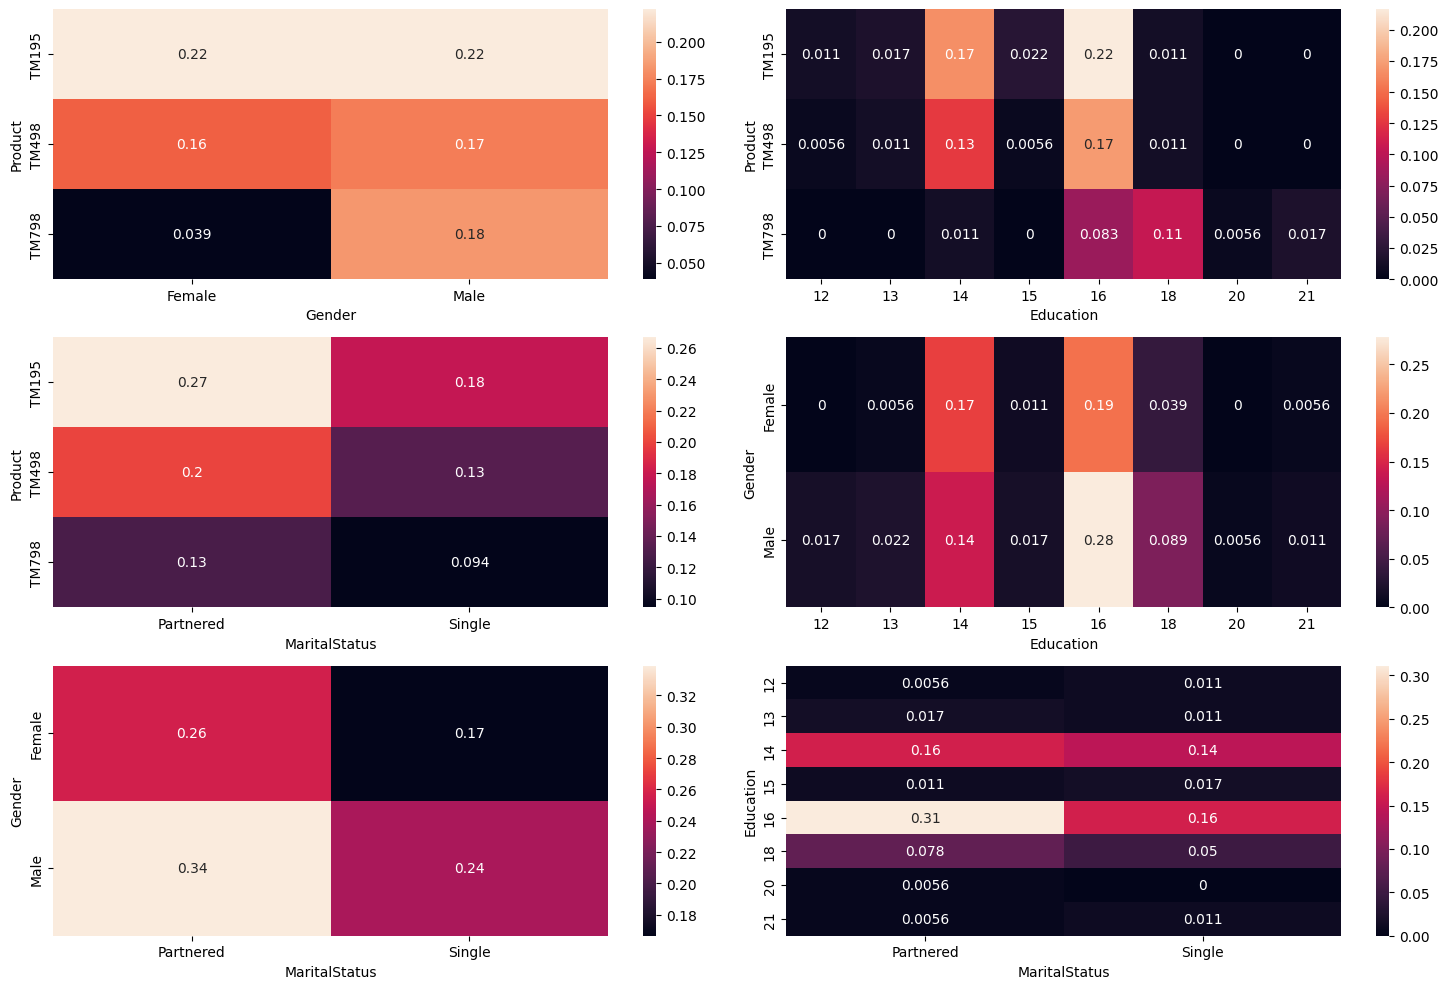

In [63]:
fig, axes = plt.subplots(nrows = len(combinaciones)//2, ncols = len(combinaciones)//3, figsize = (15,10))

axes = axes.flat
for indice, tupla in enumerate(combinaciones):
    cross = pd.crosstab(df[tupla[0]], df[tupla[1]], normalize=True) #el normalize lo pondria en porcentajes, en base a cada columna
    sns.heatmap(cross, ax= axes[indice], annot=True)
    print('.....') #normalize index lo hace en horizontal (la suma) el normalize columns lo hace la suma por columnas
    #normalize true hace elporcentaje sobre el total de cada uno
plt.tight_layout()